Test

The Data Table
Number of Records :  749
Number of Variables :  15
Variables :  ('Study Number', 'Sample ID', 'Product Type', 'Base Ingredient', 'Process Type', 'Sample Age (Weeks)', 'Difference From Fresh', 'Storage Conditions', 'Packaging Stabilizer Added', 'Transparent Window in Package', 'Processing Agent Stability Index', 'Preservative Added', 'Moisture (%)', 'Residual Oxygen (%)', 'Hexanal (ppm)')
COUNT OF MISSING VALUES IN EACH COLUMN
Missing Values in Study Number :  0
Missing Values in Sample ID :  0
Missing Values in Process Type :  0
Missing Values in Product Type :  0
Missing Values in Processing Agent Stability Index :  0
Missing Values in Sample Age (Weeks) :  0
Missing Values in Difference From Fresh :  0
Missing Values in Base Ingredient :  109
Missing Values in Moisture (%) :  236
Missing Values in Packaging Stabilizer Added :  282
Missing Values in Storage Conditions :  294
Missing Values in Residual Oxygen (%) :  329
Missing Values in Hexanal (ppm) :  460
Missing Valu

Study Number,Sample ID,Sample Age (Weeks),Difference From Fresh,Processing Agent Stability Index,ProcessTypeC,ProcessTypeB,ProcessTypeA,ProductTypeA,ProductTypeB,ProductTypeC,ProductTypeD,ProductTypeE,ProductTypeF,ProductTypeG,ProductTypeH,ProductTypeI,BaseIngredientA,BaseIngredientB,BaseIngredientC,BaseIngredientD,BaseIngredientE,BaseIngredientF,PackagingStabilizerAdded,PackagingStabilizerNotAdded,WarmClimate,ColdClimate,HighTemperatureandHumidity,PreservativeAdded,PreservativeNotAdded,Fresh
1310186,1310186-1,0,0,16.2,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1310186,1310186-1,10,0,16.2,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1310186,1310186-1,14,0,16.2,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1310186,1310186-1,16,3.3,16,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1310186,1310186-1,18,2.7,16,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


[0.8, 0.8, 0.8, 0.8, 0.7866666666666666, 0.7866666666666666, 0.7866666666666666, 0.8, 0.8, 0.8, 0.8133333333333334, 0.8, 0.7866666666666666, 0.8, 0.7866666666666666, 0.7733333333333333, 0.7866666666666666, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333, 0.7733333333333333]
Maximum Accuracy at depth=5 so continuing further on that value alone
Accuracy_Test: 0.8133333333333334
Accuracy_Train: 0.8427299703264095
0.8133333333333334
Desicion Tree Regression
[0.28443370693849046, 0.37153572485633424, 0.3848684070918811, 0.4278661561197513, 0.4499652452507013, 0.39250713805715076, 0.41551265903333734, 0.343508375967267, 0.26649332095662925]
Maximum Accuracy at depth=5 so continuing further on that value alone
Accuracy_Test: 0.4499652452507013
Accuracy_Train: 0.5546755257171767
Accuracy_Overall: 0.5193730520770649


Study Number,Sample ID,Product Type,Base Ingredient,Process Type,Sample Age (Weeks),Difference From Fresh,Storage Conditions,Packaging Stabilizer Added,Transparent Window in Package,Processing Agent Stability Index,Preservative Added,Moisture (%),Residual Oxygen (%),Hexanal (ppm),ShelfLifeInWeeks
1310186,1310186-1,D,nan,C,0,0,nan,nan,nan,16.2,nan,nan,nan,nan,18.6667
1310186,1310186-1,D,nan,C,10,0,nan,nan,nan,16.2,nan,1.56,2.87,0.1,18.6667
1310186,1310186-1,D,nan,C,14,0,nan,nan,nan,16.2,nan,1.64,2.95,0.1,18.6667
1310186,1310186-1,D,nan,C,16,3.3,nan,nan,nan,16,nan,1.6,7.13,0.09,18.6667
1310186,1310186-1,D,nan,C,18,2.7,nan,nan,nan,16,nan,1.7,12.73,0.47,18.6667
1310746,1310746-1,E,C,C,0,0,nan,nan,nan,16,nan,nan,nan,nan,14.0407
1310746,1310746-1,E,C,C,5,34,nan,nan,nan,16,nan,2.34,12.36,0.05,14.0407
1310746,1310746-1,E,C,C,11,22,nan,nan,nan,16,nan,2.13,16.48,2,14.0407
1310746,1310746-1,E,C,C,13,44,nan,nan,nan,16,nan,2.31,16.85,2,14.0407
1310746,1310746-1,E,C,C,15,50,nan,nan,nan,16,nan,nan,nan,nan,14.0407


RELATIVE IMPORTANCE OF VARIABLES IN THE MODEL
                             feature  importance
18             Difference From Fresh       0.584
0                       ProductTypeA       0.130
9                    BaseIngredientA       0.093
24  Processing Agent Stability Index       0.079
20                       ColdClimate       0.024
19                       WarmClimate       0.017
23       PackagingStabilizerNotAdded       0.016
3                       ProductTypeD       0.015
1                       ProductTypeB       0.015
4                       ProductTypeE       0.014
16                      ProcessTypeB       0.008
22          PackagingStabilizerAdded       0.003
21        HighTemperatureandHumidity       0.001
25                 PreservativeAdded       0.000
17                      ProcessTypeC       0.000
13                   BaseIngredientE       0.000
15                      ProcessTypeA       0.000
14                   BaseIngredientF       0.000
12                   Ba

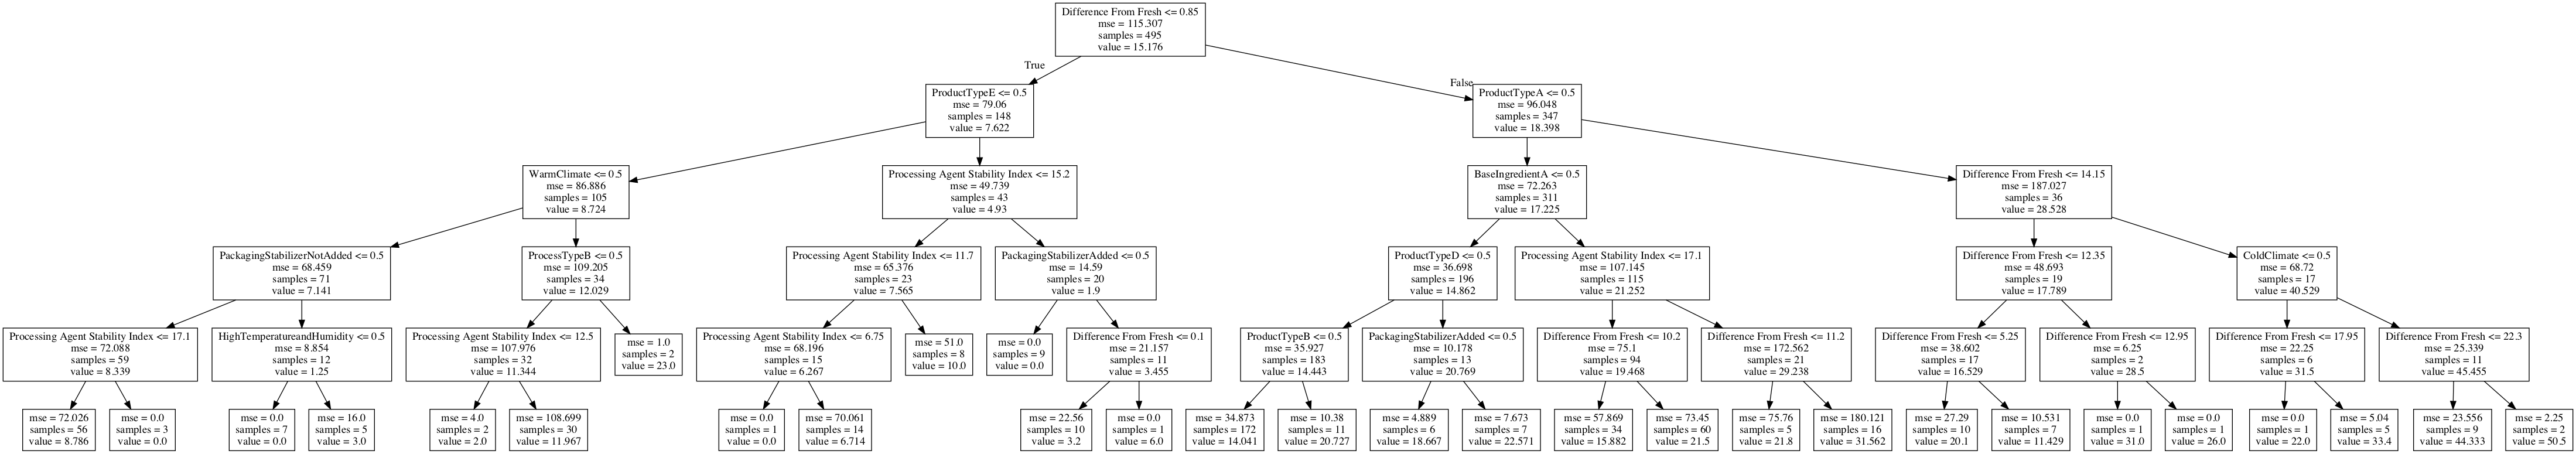

In [21]:
#---------------------------------------------------------------------------------------------------------------------

#Import necessary packages

#---------------------------------------------------------------------------------------------------------------------

from datascience import Table # Including Table functions from datascience package into the running instance
import os# including os package into running instance
from datascience.predicates import are# Import 'are' from 'predicates' in 'datascience' module for comparison
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt  # To visualize
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn import preprocessing
#from sklearn.model_selection import cross_val_score

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
#---------------------------------------------------------------------------------------------------------------------

#LOAD DATA

#---------------------------------------------------------------------------------------------------------------------

#Loading data from CSV file URL address 
InputFilepath='https://raw.githubusercontent.com/babloomarkose/DataInPython/master/ShelfLifePrediction'
ProductTable=Table().read_table(InputFilepath+'/Dataset.csv')
ProductTableOut=ProductTable

#Print the Data Table
print("The Data Table")
#ProductTable.show(5) # Show only the first 5 records

#---------------------------------------------------------------------------------------------------------------------

#EXPLORATORY DATA ANALYSIS

#---------------------------------------------------------------------------------------------------------------------

print("Number of Records : " ,  ProductTable.num_rows)
print("Number of Variables : ",ProductTable.num_columns)
print("Variables : ",ProductTable.labels)

#Find Number of Missing Values in each column
print("COUNT OF MISSING VALUES IN EACH COLUMN")
print("Missing Values in Study Number : ",ProductTable.num_rows-sum(not np.isnan(x) for x in ProductTable['Study Number']))
print("Missing Values in Sample ID : ",(ProductTable['Sample ID'] == 'nan').sum())

print("Missing Values in Process Type : ",(ProductTable['Process Type'] == 'nan').sum())
print("Missing Values in Product Type : ",(ProductTable['Product Type'] == 'nan').sum())
print("Missing Values in Processing Agent Stability Index : ",ProductTable.num_rows-sum(not np.isnan(x) for x in ProductTable['Processing Agent Stability Index']))
print("Missing Values in Sample Age (Weeks) : ",ProductTable.num_rows-sum(not np.isnan(x) for x in ProductTable['Sample Age (Weeks)']))
print("Missing Values in Difference From Fresh : ",ProductTable.num_rows-sum(not np.isnan(x) for x in ProductTable['Difference From Fresh']))

print("Missing Values in Base Ingredient : ",(ProductTable['Base Ingredient'] == 'nan').sum())
print("Missing Values in Moisture (%) : ",ProductTable.num_rows-sum(not np.isnan(x) for x in ProductTable['Moisture (%)']))
print("Missing Values in Packaging Stabilizer Added : ",(ProductTable['Packaging Stabilizer Added'] == 'nan').sum())
print("Missing Values in Storage Conditions : ",(ProductTable['Storage Conditions'] == 'nan').sum())
print("Missing Values in Residual Oxygen (%) : ",ProductTable.num_rows-sum(not np.isnan(x) for x in ProductTable['Residual Oxygen (%)']))
print("Missing Values in Hexanal (ppm) : ",ProductTable.num_rows-sum(not np.isnan(x) for x in ProductTable['Hexanal (ppm)']))
print("Missing Values in Preservative Added : ",(ProductTable['Preservative Added'] == 'nan').sum())
print("Missing Values in Transparent Window in Package : ",(ProductTable['Transparent Window in Package'] == 'nan').sum())


#Count The number of Unique Values in string variables
print("COUNT OF EACH UNIQUE VALUE IN EACH COLUMN")
print('Product Type:',Counter(ProductTable['Product Type'] ))
print('Base Ingredient: ',Counter(ProductTable['Base Ingredient'] ))
print('Process Type: ',Counter(ProductTable['Process Type'] ))
print('Storage Conditions: ',Counter(ProductTable['Storage Conditions'] ))
print('Packaging Stabilizer Added: ',Counter(ProductTable['Packaging Stabilizer Added'] ))
print('Preservative Added: ',Counter(ProductTable['Preservative Added'] ))
print('Transparent Window in Package: ',Counter(ProductTable['Transparent Window in Package'] ))
print('Processing Agent Stability Index: ',Counter(ProductTable['Processing Agent Stability Index'] ))

#---------------------------------------------------------------------------------------------------------------------

#CLEAN DATA

#---------------------------------------------------------------------------------------------------------------------

#Remove Transparent Window in Package from further consideration as non-null values  belong to only one category 
print("Remove Transparent Window in Package from further consideration as non-null values  belong to only one category" ) 
ProductTable=ProductTable.drop('Transparent Window in Package')

#Also Residual Oxygen, Moisture (%) and Hexanal (ppm) are charecteristics of aged samples. 
#Hence is of little use for prediction of shelf life. hence droping those columns also from further analysis
print("Also Residual Oxygen, Moisture (%) and Hexanal (ppm) are charecteristics of aged samples. Hence is of little use for prediction of shelf life. hence droping those columns also from further analysis" ) 

ProductTable=ProductTable.drop('Moisture (%)')
ProductTable=ProductTable.drop('Residual Oxygen (%)')
ProductTable=ProductTable.drop('Hexanal (ppm)')
#Also drop colomn Study Number/Sample ID as this is not affecting shelf life in anyway
'''ProductTable=ProductTable.drop('Study Number')
ProductTable=ProductTable.drop('Sample ID')'''
#Drop Duplicate Entries iF there are any
pandasDF=ProductTable.to_df()
pandasDF.drop_duplicates(keep='first',inplace=True)#inplace=True modify original record
ProductTable=Table.from_df(pandasDF)


'''ProductTable=ProductTable.move_column('Difference From Fresh',0)
ProductTable=ProductTable.move_column('Sample Age (Weeks)',1)
ProductTable=ProductTable.move_column('Processing Agent Stability Index',2)
ProductTable=ProductTable.move_column('Process Type',3)'''

#--------------------------------------------------------------------------------------------------------------------
#ONE HOT ENCODING(Custom)
#--------------------------------------------------------------------------------------------------------------------
ProductTable.append_column('ProcessTypeC', False)
ProductTable.append_column('ProcessTypeB', False)
ProductTable.append_column('ProcessTypeA', False)
ProductTable['ProcessTypeA']=ProductTable.apply(lambda x: True if x=='A' else False,'Process Type')
ProductTable['ProcessTypeC']=ProductTable.apply(lambda x: True if x=='C' else False,'Process Type')
ProductTable['ProcessTypeB']=ProductTable.apply(lambda x: True if x=='B' else False,'Process Type')

ProductTable=ProductTable.drop('Process Type')

#Transforming variable Product Type
ProductTable.append_column('ProductTypeA',False)
ProductTable.append_column('ProductTypeB',False)
ProductTable.append_column('ProductTypeC',False)
ProductTable.append_column('ProductTypeD',False)
ProductTable.append_column('ProductTypeE',False)
ProductTable.append_column('ProductTypeF',False)
ProductTable.append_column('ProductTypeG',False)
ProductTable.append_column('ProductTypeH',False)
ProductTable.append_column('ProductTypeI',False)
ProductTable['ProductTypeA']=ProductTable.apply(lambda x: True if x=='A' else False,'Product Type')
ProductTable['ProductTypeB']=ProductTable.apply(lambda x: True if x=='B' else False,'Product Type')
ProductTable['ProductTypeC']=ProductTable.apply(lambda x: True if x=='C' else False,'Product Type')
ProductTable['ProductTypeD']=ProductTable.apply(lambda x: True if x=='D' else False,'Product Type')
ProductTable['ProductTypeE']=ProductTable.apply(lambda x: True if x=='E' else False,'Product Type')
ProductTable['ProductTypeF']=ProductTable.apply(lambda x: True if x=='F' else False,'Product Type')
ProductTable['ProductTypeG']=ProductTable.apply(lambda x: True if x=='G' else False,'Product Type')
ProductTable['ProductTypeH']=ProductTable.apply(lambda x: True if x=='H' else False,'Product Type')
ProductTable['ProductTypeI']=ProductTable.apply(lambda x: True if x=='I' else False,'Product Type')

ProductTable=ProductTable.drop('Product Type')

#Transforming variable Product Type
#When base ingredient is not given all these fields will be 0
ProductTable.append_column('BaseIngredientA',False)
ProductTable.append_column('BaseIngredientB',False)
ProductTable.append_column('BaseIngredientC',False)
ProductTable.append_column('BaseIngredientD',False)
ProductTable.append_column('BaseIngredientE',False)
ProductTable.append_column('BaseIngredientF',False)
ProductTable['BaseIngredientA']=ProductTable.apply(lambda x: True if x=='A' else False,'Base Ingredient')
ProductTable['BaseIngredientB']=ProductTable.apply(lambda x: True if x=='B' else False,'Base Ingredient')
ProductTable['BaseIngredientC']=ProductTable.apply(lambda x: True if x=='C' else False,'Base Ingredient')
ProductTable['BaseIngredientD']=ProductTable.apply(lambda x: True if x=='D' else False,'Base Ingredient')
ProductTable['BaseIngredientE']=ProductTable.apply(lambda x: True if x=='E' else False,'Base Ingredient')
ProductTable['BaseIngredientF']=ProductTable.apply(lambda x: True if x=='F' else False,'Base Ingredient')

ProductTable=ProductTable.drop('Base Ingredient')

#Transforming variable Packaging Stabilizer Added
#When information on Packaging Stabilizer Added is not given, these two fields will be 0
ProductTable.append_column('PackagingStabilizerAdded',False)
ProductTable['PackagingStabilizerAdded']=ProductTable.apply(lambda x: True if x=='Y' else False,'Packaging Stabilizer Added')
ProductTable.append_column('PackagingStabilizerNotAdded',False)
ProductTable['PackagingStabilizerNotAdded']=ProductTable.apply(lambda x: True if x=='N' else False,'Packaging Stabilizer Added')
ProductTable=ProductTable.drop('Packaging Stabilizer Added')

#Transforming variable Storage Conditions
#When information on Storage Conditions is not given, these three fields will be 0
ProductTable.append_column('WarmClimate',False)
ProductTable.append_column('ColdClimate',False)
ProductTable.append_column('HighTemperatureandHumidity',False)
ProductTable['WarmClimate']=ProductTable.apply(lambda x: True if x=='Warm Climate' else False,'Storage Conditions')
ProductTable['ColdClimate']=ProductTable.apply(lambda x: True if x=='Cold Climate' else False,'Storage Conditions')
ProductTable['HighTemperatureandHumidity']=ProductTable.apply(lambda x: True if x=='High Temperature and Humidity' else False,'Storage Conditions')
ProductTable=ProductTable.drop('Storage Conditions')

#Transforming variable Preservative Added
#When information on Preservative Added is not given, these two fields will be 0
ProductTable.append_column('PreservativeAdded',False)
ProductTable.append_column('PreservativeNotAdded',False)
ProductTable['PreservativeAdded']=ProductTable.apply(lambda x: True if x=='Y' else False,'Preservative Added')
ProductTable['PreservativeNotAdded']=ProductTable.apply(lambda x: True if x=='N' else False,'Preservative Added')
ProductTable=ProductTable.drop('Preservative Added')

#Add new colomn Fresh based on 'Difference From Fresh' True for value less than or equal to 20 else False
ProductTable.append_column('Fresh',True)
ProductTable['Fresh']=ProductTable.apply(lambda x: True if x<=20 else False,'Difference From Fresh')


ProductTable.show(5) # Show only the first 5 records
#---------------------------------------------------------------------------------------------------------------------

#Prep Data for Decision Tree

#---------------------------------------------------------------------------------------------------------------------

pandasDF=ProductTable.to_df()
#For Classification : Dependent Variable "Fresh" 
X = pandasDF[['ProductTypeA','ProductTypeB','ProductTypeC','ProductTypeD','ProductTypeE','ProductTypeF','ProductTypeG','ProductTypeH','ProductTypeI',
                  'BaseIngredientA','BaseIngredientB','BaseIngredientC','BaseIngredientD','BaseIngredientE','BaseIngredientF',
                  'ProcessTypeA','ProcessTypeB','ProcessTypeC',
                  'Sample Age (Weeks)','WarmClimate','ColdClimate','HighTemperatureandHumidity',
                  'PackagingStabilizerAdded','PackagingStabilizerNotAdded',
                  'Processing Agent Stability Index','PreservativeAdded','PreservativeNotAdded']] 

Y = pandasDF['Fresh']

feature_cols= ['ProductTypeA','ProductTypeB','ProductTypeC','ProductTypeD','ProductTypeE','ProductTypeF','ProductTypeG','ProductTypeH','ProductTypeI',
                  'BaseIngredientA','BaseIngredientB','BaseIngredientC','BaseIngredientD','BaseIngredientE','BaseIngredientF',
                  'ProcessTypeA','ProcessTypeB','ProcessTypeC',
                  'Sample Age (Weeks)','WarmClimate','ColdClimate','HighTemperatureandHumidity',
                  'PackagingStabilizerAdded','PackagingStabilizerNotAdded',
                  'Processing Agent Stability Index','PreservativeAdded','PreservativeNotAdded']

pandasDF_DTC=ProductTable.to_df()

#For Regression Dependent Variable Sample Age (Weeks)
X_DTC = pandasDF[['ProductTypeA','ProductTypeB','ProductTypeC','ProductTypeD','ProductTypeE','ProductTypeF','ProductTypeG','ProductTypeH','ProductTypeI',
                  'BaseIngredientA','BaseIngredientB','BaseIngredientC','BaseIngredientD','BaseIngredientE','BaseIngredientF',
                  'ProcessTypeA','ProcessTypeB','ProcessTypeC',
                  'Difference From Fresh','WarmClimate','ColdClimate','HighTemperatureandHumidity',
                  'PackagingStabilizerAdded','PackagingStabilizerNotAdded',
                  'Processing Agent Stability Index','PreservativeAdded','PreservativeNotAdded']] 
FeaturesUsed = ['ProductTypeA','ProductTypeB','ProductTypeC','ProductTypeD','ProductTypeE','ProductTypeF','ProductTypeG','ProductTypeH','ProductTypeI',
                  'BaseIngredientA','BaseIngredientB','BaseIngredientC','BaseIngredientD','BaseIngredientE','BaseIngredientF',
                  'ProcessTypeA','ProcessTypeB','ProcessTypeC',
                  'Difference From Fresh','WarmClimate','ColdClimate','HighTemperatureandHumidity',
                  'PackagingStabilizerAdded','PackagingStabilizerNotAdded',
                  'Processing Agent Stability Index','PreservativeAdded','PreservativeNotAdded']
Y_DTC= pandasDF['Sample Age (Weeks)']
#---------------------------------------------------------------------------------------------------------------------

#Desicion Tree Classification

#---------------------------------------------------------------------------------------------------------------------

# Split dataset into training set and test set
X_Train_DT, X_Test_DT, Y_Train_DT, Y_Test_DT = train_test_split(X, Y, test_size=0.10, random_state=0) # 90% training and 10% test

#FIND THE VALUE FOR WHICH THE DEPTH OF TREE GIVES MAXIMUM ACCURACY

# List of values to try for max_depth:
max_depth_range = list(range(1, 30))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_Train_DT,Y_Train_DT)
    score = clf.score(X_Test_DT, Y_Test_DT)
    accuracy.append(score)
print(accuracy)    
print("Maximum Accuracy at depth=5 so continuing further on that value alone" ) 


# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini",max_depth = 5,splitter='random',random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_Train_DT,Y_Train_DT)

#Predict the response for test dataset
Y_Pred_DT_Test = clf.predict(X_Test_DT)
Y_Pred_DT_Train = clf.predict(X_Train_DT)

print("Accuracy_Test:",metrics.accuracy_score(Y_Test_DT, Y_Pred_DT_Test))
print("Accuracy_Train:",metrics.accuracy_score(Y_Train_DT, Y_Pred_DT_Train))

# The score method returns the accuracy of the model
score = clf.score(X_Test_DT, Y_Test_DT)
print(score)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Fresh','NotFresh'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DTShelfLife.png')
Image(graph.create_png())

#---------------------------------------------------------------------------------------------------------------------

#Desicion Tree Regression

#---------------------------------------------------------------------------------------------------------------------
#PREDICTION OF SHELF LIFE USING REGRESSION 
#Predict 'Sample Age (Weeks)' USING DECISION TREE REGRESSION
#Substitute <20 for 'Difference From Fresh'
#Predict new value of Age which will be the shelf life of that product
print("Desicion Tree Regression" ) 

X_Train_DTC, X_Test_DTC, Y_Train_DTC, Y_Test_DTC = train_test_split(X_DTC, Y_DTC, test_size=0.338,random_state = 0) # 66.2% training and 33.8% test

#FIND DEPTH OF TREE FOR WHICH MAXIMUM ACCURACY IS OBSERVED

# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the average ROOT MEAN SQUARE ERROR for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_Train_DTC,Y_Train_DTC)
    score = clf.score(X_Test_DTC, Y_Test_DTC)
    accuracy.append(score)
print(accuracy)    
print("Maximum Accuracy at depth=5 so continuing further on that value alone" ) 

#FIT THE DECISION TREE REGRESSOR

clf1 = DecisionTreeRegressor(max_depth =5,random_state = 0)
clf1=clf1.fit(X_Train_DTC, Y_Train_DTC)

#Predict the response for test and train dataset
Y_Pred_DTC_Test = clf1.predict(X_Test_DTC)
Y_Pred_DTC_Train = clf1.predict(X_Train_DTC)

score1 = clf1.score(X_Test_DTC, Y_Test_DTC)
score2 = clf1.score(X_Train_DTC, Y_Train_DTC)

print("Accuracy_Test:",score1)
print("Accuracy_Train:",score2)


ProductTable.append_column('Predicted Sample Age (Weeks)',clf1.predict(X_DTC))
'''ProductTable=ProductTable.move_column('Predicted Sample Age (Weeks)',1)'''
score3 = clf1.score(X_DTC, Y_DTC)
print("Accuracy_Overall:",score3)

#NEW COLOMN WITH 'Difference From Fresh'=19
ProductTable.append_column('Difference From Fresh20',20)
pandasDF_withColumnDifference_From_Fresh20=ProductTable.to_df()
X_New_Prediction=pandasDF_withColumnDifference_From_Fresh20[['ProductTypeA','ProductTypeB','ProductTypeC','ProductTypeD','ProductTypeE','ProductTypeF','ProductTypeG','ProductTypeH','ProductTypeI',
                  'BaseIngredientA','BaseIngredientB','BaseIngredientC','BaseIngredientD','BaseIngredientE','BaseIngredientF',
                  'ProcessTypeA','ProcessTypeB','ProcessTypeC',
                  'Difference From Fresh20','WarmClimate','ColdClimate','HighTemperatureandHumidity',
                  'PackagingStabilizerAdded','PackagingStabilizerNotAdded',
                  'Processing Agent Stability Index','PreservativeAdded','PreservativeNotAdded']]

#NEW COLOMN ShelfLife AS PREDICTED OUTPUT FROM MODEL
ProductTable.append_column('ShelfLifeInWeeks',clf1.predict(X_New_Prediction))
ProductTable=ProductTable.move_column('ShelfLifeInWeeks',2)
ProductTableOut.append_column('Prediction',clf1.predict(X_New_Prediction))
ProductTableOut.show()

#RELATIVE IMPORTANCE OF VARIABLES IN THE MODEL
print("RELATIVE IMPORTANCE OF VARIABLES IN THE MODEL")
importances = pd.DataFrame({'feature':X_Train_DTC.columns,'importance':np.round(clf1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

dot_data1 = StringIO()
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(clf1, out_file =dot_data1,
               feature_names =FeaturesUsed) 
graph2 = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
graph2.write_png('DTShelfLife1.png')
Image(graph2.create_png())